# Analysis of PageRank
This notebook serves to compare the different PageRank methods.
For this purpose the new methods are compared with the results achieved by Wachsmuth et.al.2017.

### Create Paths

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from pagerank.NetworkXPageRank import NetworkXPageRank
from pagerank.OriginalPageRank import OriginalPageRank
from pagerank.PaperPageRank import PaperPageRank
from utils.Aggregation import min_aggregation, avg_aggregation, max_aggregation, sum_aggregation
from utils.Correlation import calculate_kendall_correlation

PATH_GROUND_TRUTH_LIST = "../Webis-ArgRank-17-Dataset/ground-truth-list.csv"
PATH_GROUND_TRUTH_JSON = "../Graph-Construction/groundtruth.json"
PATH_NODE_MAPPING_JSON = "../Graph-Construction/node_mapping.json"
PATH_ARGUMENT_LIST = "../Webis-ArgRank-17-Dataset/argument-list.csv"
PATH_ARGUMENT_UNIT_LIST = "../Webis-ArgRank-17-Dataset/argument-unit-list.csv"
PATH_GENERATED_PAGE_RANK_DATA = "./pagerank/data"

In [2]:
def calculate_rankings(method) -> dict:
    """
    This method calculates kendall correlations for all aggregations.
    
    :param method: Method which should be applied. 
    :return: Dict with all infos and results about the kendall correlation ot the method to each aggregation.
    """
    aggregations = [
        min_aggregation,
        avg_aggregation,
        max_aggregation,
        sum_aggregation
    ]
    keys = ["min", "avg", "max", "sum"]
    results = {}
    for i in range(0, 4):
        tau, tau_dict = calculate_kendall_correlation(score_function=method,
                                                      aggregation_function=aggregations[i],
                                                      path_ground_truth_list=PATH_GROUND_TRUTH_LIST,
                                                      path_argument_list=PATH_ARGUMENT_LIST)
        results[keys[i]] = {
            "tau" : tau,
            "tau_dict" : tau_dict
        }
        print("Done with {}, {}".format(method, keys[i]))
    return results

### Get tau values for the PageRank in the Paper

In [3]:
paper_pager_rank = PaperPageRank(path_argument_unit_list = PATH_ARGUMENT_UNIT_LIST)

paper_pager_rank_results = calculate_rankings(paper_pager_rank.calculate_paper_page_rank)

Done with <bound method PaperPageRank.calculate_paper_page_rank of <pagerank.PaperPageRank.PaperPageRank object at 0x1232b3410>>, min
Done with <bound method PaperPageRank.calculate_paper_page_rank of <pagerank.PaperPageRank.PaperPageRank object at 0x1232b3410>>, avg
Done with <bound method PaperPageRank.calculate_paper_page_rank of <pagerank.PaperPageRank.PaperPageRank object at 0x1232b3410>>, max
Done with <bound method PaperPageRank.calculate_paper_page_rank of <pagerank.PaperPageRank.PaperPageRank object at 0x1232b3410>>, sum


In [4]:
paper_pager_rank_results



{'min': {'tau': 0.01,
  'tau_dict': {23: -0.7378647873726218,
   162: 1.0,
   215: 1.0,
   249: -0.816496580927726,
   254: -0.6666666666666669,
   401: 1.0,
   435: 0.33333333333333337,
   586: 1.0,
   687: 0.0,
   947: 0.39999999999999997,
   188: 0.5976143046671968,
   2522: -1.0,
   2546: -0.49999999999999994,
   2617: -0.33333333333333337,
   2656: 1.0,
   3786: -0.2357022603955159,
   3788: 0.31622776601683794,
   3809: 0.31622776601683794,
   4087: -0.2335496832484569,
   4249: -1.0,
   4334: 0.0,
   4617: -1.0,
   4604: 0.7071067811865477,
   8370: -0.816496580927726,
   8549: 0.0,
   25530: 0.0,
   26224: -0.7071067811865477,
   26860: -0.8164965809277261,
   27319: 0.5,
   27339: 0.0,
   28309: 0.0,
   28527: 1.0}},
 'avg': {'tau': 0.02,
  'tau_dict': {23: -0.7378647873726218,
   162: 1.0,
   215: 1.0,
   249: -0.816496580927726,
   254: -0.6666666666666669,
   401: 1.0,
   435: 0.33333333333333337,
   586: 1.0,
   687: 0.0,
   947: 0.39999999999999997,
   188: 0.597614304667

### Get tau values for our PageRank implementation

In [5]:
original_page_rank_results = {}
for alpha in np.arange(0, 1.1, 0.1):
    alpha = round(alpha, 2)
    original_page_rank = OriginalPageRank(alpha=alpha,
                                          epochs=1,
                                          suffix='_fixed_epochs',
                                          path=PATH_GENERATED_PAGE_RANK_DATA,
                                          path_argument_unit_list=PATH_ARGUMENT_UNIT_LIST,
                                          path_ground_truth=PATH_GROUND_TRUTH_JSON,
                                          path_node_mapping=PATH_NODE_MAPPING_JSON)

    original_page_rank_results["Alpha{}".format(alpha)]  = calculate_rankings(original_page_rank.calculate_original_page_rank)



Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object at 0x1232b5050>>, min
Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object at 0x1232b5050>>, avg
Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object at 0x1232b5050>>, max
Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object at 0x1232b5050>>, sum
Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object at 0x1232b5150>>, min
Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object at 0x1232b5150>>, avg
Done with <bound method OriginalPageRank.calculate_original_page_rank of <pagerank.OriginalPageRank.OriginalPageRank object 

In [6]:
original_page_rank_results



{'Alpha0.0': {'min': {'tau': 0.01,
   'tau_dict': {23: -0.8366600265340756,
    162: 0.816496580927726,
    215: 1.0,
    249: -0.816496580927726,
    254: -0.6666666666666669,
    401: 0.816496580927726,
    435: 0.33333333333333337,
    586: 1.0,
    687: 0.0,
    947: 0.31622776601683794,
    188: 0.5976143046671968,
    2522: -1.0,
    2546: -0.49999999999999994,
    2617: -0.816496580927726,
    2656: 1.0,
    3786: 0.0,
    3788: 0.0,
    3809: 0.0,
    4087: -0.2335496832484569,
    4249: 0.0,
    4334: 0.0,
    4617: 0.0,
    4604: 0.0,
    8370: -0.816496580927726,
    8549: 0.0,
    25530: 0.0,
    26224: -0.7071067811865477,
    26860: -0.8164965809277261,
    27319: 0.5,
    27339: 0.0,
    28309: 0.0,
    28527: 1.0}},
  'avg': {'tau': 0.03,
   'tau_dict': {23: -0.8366600265340756,
    162: 0.816496580927726,
    215: 1.0,
    249: -0.816496580927726,
    254: -0.6666666666666669,
    401: 0.816496580927726,
    435: 0.33333333333333337,
    586: 1.0,
    687: 0.0,
    947

### Get tau values for NetworkX PageRank implementation

In [7]:
networkx_page_rank_results = {}
for alpha in np.arange(0, 1.1, 0.1):
    alpha = round(alpha, 2)
    networkx_page_rank = NetworkXPageRank(page_rank_func=nx.pagerank,
                                          alpha=alpha,
                                          path_argument_unit_list=PATH_ARGUMENT_UNIT_LIST,
                                          path_ground_truth=PATH_GROUND_TRUTH_JSON)

    networkx_page_rank_results["Alpha{}".format(alpha)]  = calculate_rankings(networkx_page_rank.calculate_original_page_rank)



Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x1256e00d0>>, min
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x1256e00d0>>, avg
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x1256e00d0>>, max
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x1256e00d0>>, sum
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x1263de0d0>>, min
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x1263de0d0>>, avg
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object 

In [8]:
networkx_page_rank_results

{'Alpha0.0': {'min': {'tau': 0.01,
   'tau_dict': {23: -0.8366600265340756,
    162: 0.816496580927726,
    215: 1.0,
    249: -0.816496580927726,
    254: -0.6666666666666669,
    401: 0.816496580927726,
    435: 0.33333333333333337,
    586: 1.0,
    687: 0.0,
    947: 0.31622776601683794,
    188: 0.5976143046671968,
    2522: -1.0,
    2546: -0.49999999999999994,
    2617: -0.816496580927726,
    2656: 1.0,
    3786: 0.0,
    3788: 0.0,
    3809: 0.0,
    4087: -0.2335496832484569,
    4249: 0.0,
    4334: 0.0,
    4617: 0.0,
    4604: 0.0,
    8370: -0.816496580927726,
    8549: 0.0,
    25530: 0.0,
    26224: -0.7071067811865477,
    26860: -0.8164965809277261,
    27319: 0.5,
    27339: 0.0,
    28309: 0.0,
    28527: 1.0}},
  'avg': {'tau': 0.03,
   'tau_dict': {23: -0.8366600265340756,
    162: 0.816496580927726,
    215: 1.0,
    249: -0.816496580927726,
    254: -0.6666666666666669,
    401: 0.816496580927726,
    435: 0.33333333333333337,
    586: 1.0,
    687: 0.0,
    947

### Get tau values for NetworkX Scipy PageRank implementation

In [9]:
networkx_scipy_page_rank_results = {}
for alpha in np.arange(0, 1.1, 0.1):
    alpha = round(alpha, 2)
    networkx_scipy_page_rank = NetworkXPageRank(page_rank_func=nx.pagerank_scipy,
                                          alpha=alpha,
                                          path_argument_unit_list=PATH_ARGUMENT_UNIT_LIST,
                                          path_ground_truth=PATH_GROUND_TRUTH_JSON)

    networkx_scipy_page_rank_results["Alpha{}".format(alpha)]  = calculate_rankings(networkx_scipy_page_rank.calculate_original_page_rank)


Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x12521b950>>, min
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x12521b950>>, avg
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x12521b950>>, max
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x12521b950>>, sum
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x1220cd650>>, min
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object at 0x1220cd650>>, avg
Done with <bound method NetworkXPageRank.calculate_original_page_rank of <pagerank.NetworkXPageRank.NetworkXPageRank object 

In [10]:
networkx_scipy_page_rank_results

{'Alpha0.0': {'min': {'tau': 0.01,
   'tau_dict': {23: -0.8366600265340756,
    162: 0.816496580927726,
    215: 1.0,
    249: -0.816496580927726,
    254: -0.6666666666666669,
    401: 0.816496580927726,
    435: 0.33333333333333337,
    586: 1.0,
    687: 0.0,
    947: 0.31622776601683794,
    188: 0.5976143046671968,
    2522: -1.0,
    2546: -0.49999999999999994,
    2617: -0.816496580927726,
    2656: 1.0,
    3786: 0.0,
    3788: 0.0,
    3809: 0.0,
    4087: -0.2335496832484569,
    4249: 0.0,
    4334: 0.0,
    4617: 0.0,
    4604: 0.0,
    8370: -0.816496580927726,
    8549: 0.0,
    25530: 0.0,
    26224: -0.7071067811865477,
    26860: -0.8164965809277261,
    27319: 0.5,
    27339: 0.0,
    28309: 0.0,
    28527: 1.0}},
  'avg': {'tau': 0.03,
   'tau_dict': {23: -0.8366600265340756,
    162: 0.816496580927726,
    215: 1.0,
    249: -0.816496580927726,
    254: -0.6666666666666669,
    401: 0.816496580927726,
    435: 0.33333333333333337,
    586: 1.0,
    687: 0.0,
    947

### Plot the results per aggregation

In [11]:
implementations = ["Wachsmuth PR", "Feger/Steimann PR", "NetworkX PR", "NetworkX Scipy PR"]

#### Plot min results

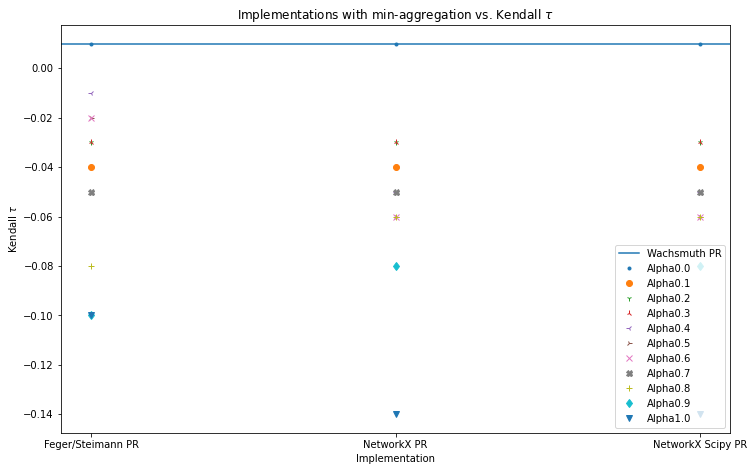

In [12]:
plt.figure(figsize=(12,7.5))
aggretation = 'min'
xaxis_labels = ["Feger/Steimann PR", "NetworkX PR", "NetworkX Scipy PR"]
markers = ['.', 'o', '1', '2', '3', '4', 'x', 'X', '+', 'd', 'v']
plt.axhline(y = paper_pager_rank_results[aggretation]['tau'], label="Wachsmuth PR")
marker_count = 0
for alpha in np.arange(0, 1.1, 0.1):
    alpha = "Alpha{}".format(round(alpha, 2))
    values = [
        original_page_rank_results[alpha][aggretation]['tau'],
        networkx_page_rank_results[alpha][aggretation]['tau'],
        networkx_scipy_page_rank_results[alpha][aggretation]['tau']
    ]
    plt.plot(xaxis_labels, values, marker=markers[marker_count], linestyle='' , alpha=1, label=alpha)
    marker_count += 1

plt.xlabel('Implementation')
plt.ylabel('Kendall ' + r'$\tau$')
plt.title('Implementations with '+aggretation+'-aggregation vs. Kendall '+ r'$\tau$')
plt.legend()
plt.savefig('./pictures/MinPageRank.png', bbox_inches='tight')
plt.show()

#### Plot avg results

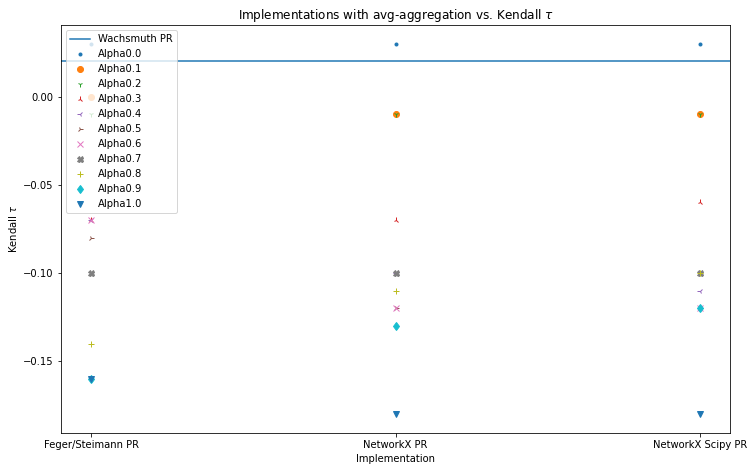

In [13]:
plt.figure(figsize=(12,7.5))
aggretation = 'avg'
xaxis_labels = ["Feger/Steimann PR", "NetworkX PR", "NetworkX Scipy PR"]
markers = ['.', 'o', '1', '2', '3', '4', 'x', 'X', '+', 'd', 'v']
plt.axhline(y = paper_pager_rank_results[aggretation]['tau'], label="Wachsmuth PR")
marker_count = 0
for alpha in np.arange(0, 1.1, 0.1):
    alpha = "Alpha{}".format(round(alpha, 2))
    values = [
        original_page_rank_results[alpha][aggretation]['tau'],
        networkx_page_rank_results[alpha][aggretation]['tau'],
        networkx_scipy_page_rank_results[alpha][aggretation]['tau']
    ]
    plt.plot(xaxis_labels, values, marker=markers[marker_count], linestyle='' , alpha=1, label=alpha)
    marker_count += 1

plt.xlabel('Implementation')
plt.ylabel('Kendall ' + r'$\tau$')
plt.title('Implementations with '+aggretation+'-aggregation vs. Kendall '+ r'$\tau$')
plt.legend()
plt.savefig('./pictures/AvgPageRank.png', bbox_inches='tight')
plt.show()

#### Plot max results

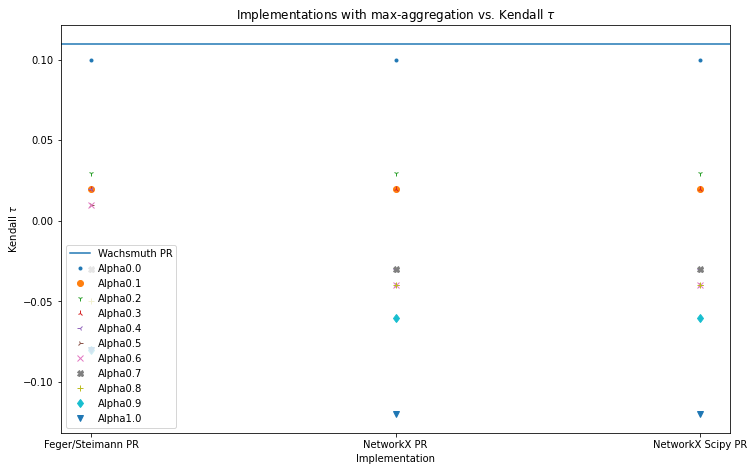

In [14]:
plt.figure(figsize=(12,7.5))
aggretation = 'max'
xaxis_labels = ["Feger/Steimann PR", "NetworkX PR", "NetworkX Scipy PR"]
markers = ['.', 'o', '1', '2', '3', '4', 'x', 'X', '+', 'd', 'v']
plt.axhline(y = paper_pager_rank_results[aggretation]['tau'], label="Wachsmuth PR")
marker_count = 0
for alpha in np.arange(0, 1.1, 0.1):
    alpha = "Alpha{}".format(round(alpha, 2))
    values = [
        original_page_rank_results[alpha][aggretation]['tau'],
        networkx_page_rank_results[alpha][aggretation]['tau'],
        networkx_scipy_page_rank_results[alpha][aggretation]['tau']
    ]
    plt.plot(xaxis_labels, values, marker=markers[marker_count], linestyle='' , alpha=1, label=alpha)
    marker_count += 1

plt.xlabel('Implementation')
plt.ylabel('Kendall ' + r'$\tau$')
plt.title('Implementations with '+aggretation+'-aggregation vs. Kendall '+ r'$\tau$')
plt.legend()
plt.savefig('./pictures/MaxPageRank.png', bbox_inches='tight')
plt.show()

#### Plot sum results

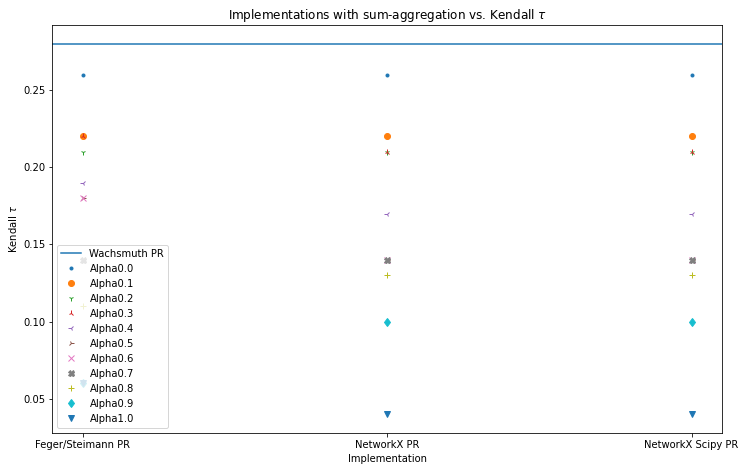

In [15]:
plt.figure(figsize=(12,7.5))
aggretation = 'sum'
xaxis_labels = ["Feger/Steimann PR", "NetworkX PR", "NetworkX Scipy PR"]
markers = ['.', 'o', '1', '2', '3', '4', 'x', 'X', '+', 'd', 'v']
plt.axhline(y = paper_pager_rank_results[aggretation]['tau'], label="Wachsmuth PR")
marker_count = 0
for alpha in np.arange(0, 1.1, 0.1):
    alpha = "Alpha{}".format(round(alpha, 2))
    values = [
        original_page_rank_results[alpha][aggretation]['tau'],
        networkx_page_rank_results[alpha][aggretation]['tau'],
        networkx_scipy_page_rank_results[alpha][aggretation]['tau']
    ]
    plt.plot(xaxis_labels, values, marker=markers[marker_count], linestyle='' , alpha=1, label=alpha)
    marker_count += 1

plt.xlabel('Implementation')
plt.ylabel('Kendall ' + r'$\tau$')
plt.title('Implementations with '+aggretation+'-aggregation vs. Kendall '+ r'$\tau$')
plt.legend()
plt.savefig('./pictures/SumPageRank.png', bbox_inches='tight')
plt.show()

### Plot overall comparison

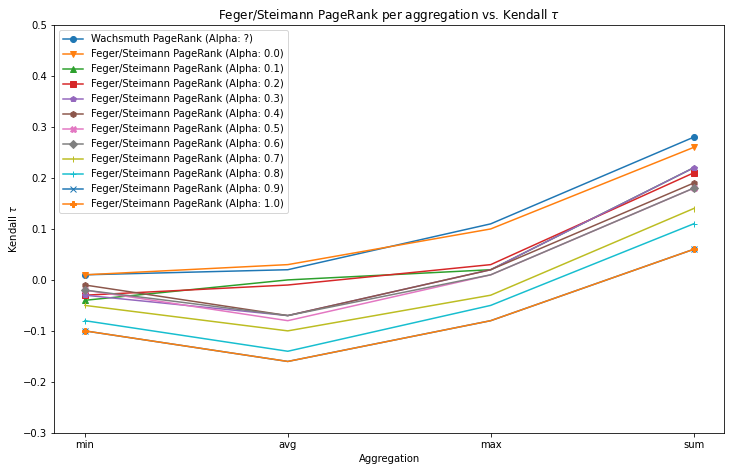

In [16]:
plt.figure(figsize=(12,7.5))
aggregations = ["min", "avg", "max", "sum"]
paper_page_rank_per_aggregation = [paper_pager_rank_results[aggregation]['tau'] for aggregation in aggregations]

plt.plot(aggregations, paper_page_rank_per_aggregation, marker='o', ls='-', markevery=[0,-1], label='Wachsmuth PageRank (Alpha: {})'.format('?'))      

markers = ['v', '^', 's', 'p', 'h', 'X', 'D', '|', '+', 'x', 'P']

for marker, alpha in zip(markers, np.arange(0, 1.1, 0.1)):
    original_page_rank_per_aggregation = [
        original_page_rank_results['Alpha{}'.format(round(alpha, 2))][aggregation]['tau'] 
                                          for aggregation in aggregations
    ]
    plt.plot(aggregations, original_page_rank_per_aggregation, marker=marker, ls='-', markevery=[0,-1], label='Feger/Steimann PageRank (Alpha: {})'.format(round(alpha, 2)))  

plt.xlabel('Aggregation')
plt.ylabel('Kendall ' + r'$\tau$')
plt.title('Feger/Steimann PageRank per aggregation vs. Kendall '+ r'$\tau$')
plt.legend()
plt.ylim([-0.3, 0.5])

plt.savefig('./pictures/FegerSteimannPageRank.png', bbox_inches='tight')
plt.show()

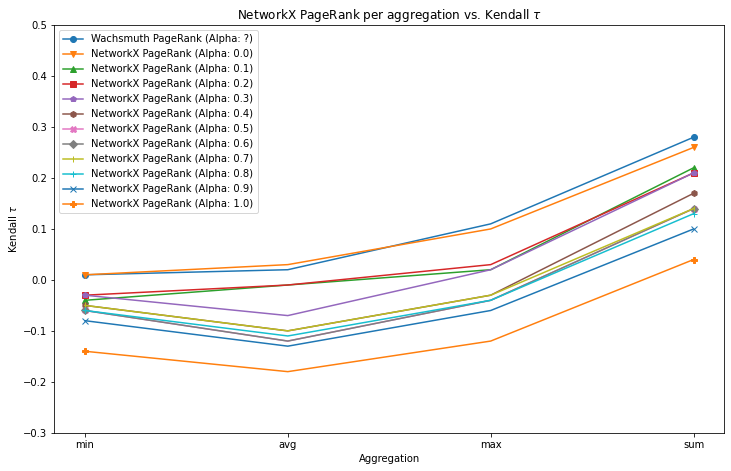

In [17]:
plt.figure(figsize=(12,7.5))
aggregations = ["min", "avg", "max", "sum"]
paper_page_rank_per_aggregation = [paper_pager_rank_results[aggregation]['tau'] for aggregation in aggregations]

plt.plot(aggregations, paper_page_rank_per_aggregation,marker='o', ls='-', markevery=[0,-1], label='Wachsmuth PageRank (Alpha: {})'.format('?'))      

for marker, alpha in zip(markers, np.arange(0, 1.1, 0.1)):
    networkx_page_rank_per_aggregation = [
        networkx_page_rank_results['Alpha{}'.format(round(alpha, 2))][aggregation]['tau'] 
                                          for aggregation in aggregations
    ]
    plt.plot(aggregations, networkx_page_rank_per_aggregation, marker=marker, ls='-', markevery=[0,-1],  label='NetworkX PageRank (Alpha: {})'.format(round(alpha, 2)))  

plt.xlabel('Aggregation')
plt.ylabel('Kendall ' + r'$\tau$')
plt.title('NetworkX PageRank per aggregation vs. Kendall '+ r'$\tau$')
plt.legend()
plt.ylim([-0.3, 0.5])

plt.savefig('./pictures/NetworkXPageRank.png', bbox_inches='tight')
plt.show()

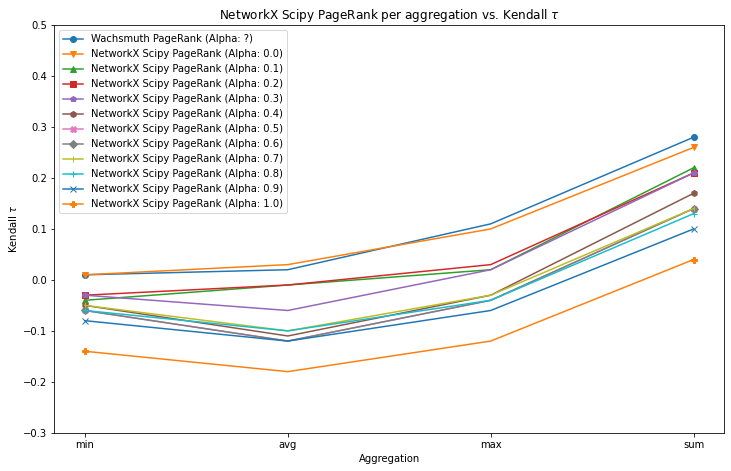

In [18]:
plt.figure(figsize=(12,7.5))
aggregations = ["min", "avg", "max", "sum"]
paper_page_rank_per_aggregation = [paper_pager_rank_results[aggregation]['tau'] for aggregation in aggregations]

plt.plot(aggregations, paper_page_rank_per_aggregation,marker='o', ls='-', markevery=[0,-1], label='Wachsmuth PageRank (Alpha: {})'.format('?'))      

for marker, alpha in zip(markers, np.arange(0, 1.1, 0.1)):
    networkx_scipy_page_rank_per_aggregation = [
        networkx_scipy_page_rank_results['Alpha{}'.format(round(alpha, 2))][aggregation]['tau'] 
                                          for aggregation in aggregations
    ]
    plt.plot(aggregations, networkx_scipy_page_rank_per_aggregation,marker=marker, ls='-', markevery=[0,-1],  label='NetworkX Scipy PageRank (Alpha: {})'.format(round(alpha, 2)))  

plt.xlabel('Aggregation')
plt.ylabel('Kendall ' + r'$\tau$')
plt.title('NetworkX Scipy PageRank per aggregation vs. Kendall '+ r'$\tau$')
plt.legend()
plt.ylim([-0.3, 0.5])

plt.savefig('./pictures/NetworkXScipyPageRank.png', bbox_inches='tight')
plt.show()

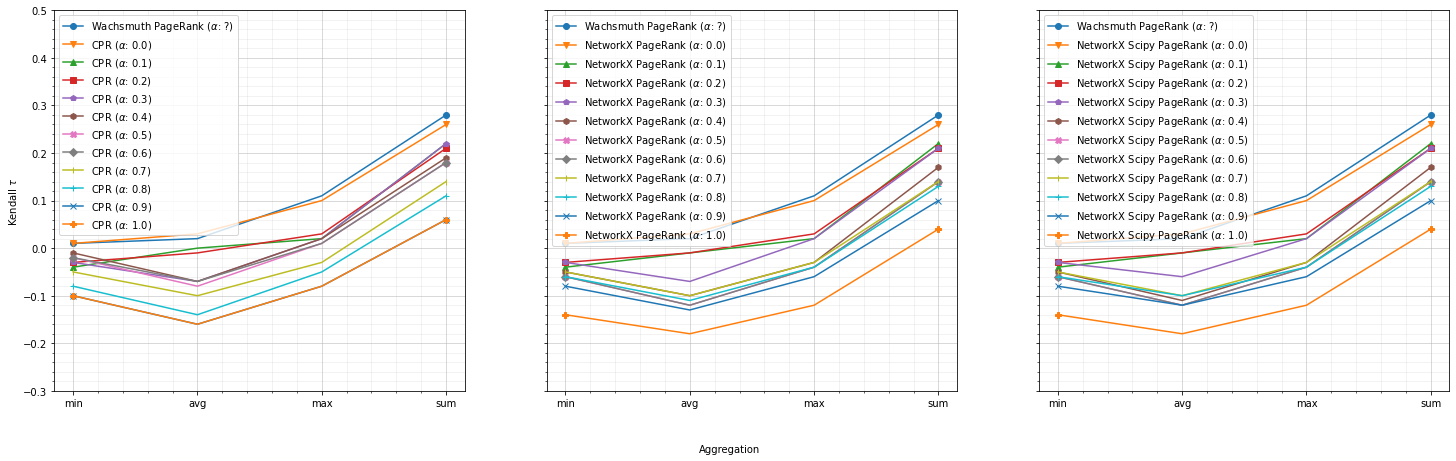

In [19]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(25,7))

aggregations = ["min", "avg", "max", "sum"]
paper_page_rank_per_aggregation = [paper_pager_rank_results[aggregation]['tau'] for aggregation in aggregations]

ax1.plot(aggregations, paper_page_rank_per_aggregation, marker='o', ls='-', markevery=[0,-1], label='Wachsmuth PageRank ('+r'$\alpha$'+': {})'.format('?'))      

markers = ['v', '^', 's', 'p', 'h', 'X', 'D', '|', '+', 'x', 'P']

for marker, alpha in zip(markers, np.arange(0, 1.1, 0.1)):
    original_page_rank_per_aggregation = [
        original_page_rank_results['Alpha{}'.format(round(alpha, 2))][aggregation]['tau'] 
                                          for aggregation in aggregations
    ]
    ax1.plot(aggregations, original_page_rank_per_aggregation, marker=marker, ls='-', markevery=[0,-1], label='CPR ('+r'$\alpha$'+': {})'.format(round(alpha, 2)))  

ax1.legend()
ax1.set_ylim([-0.3, 0.5])
ax1.set_ylabel('Kendall ' + r'$\tau$')
ax1.minorticks_on()
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.6)


ax2.plot(aggregations, paper_page_rank_per_aggregation,marker='o', ls='-', markevery=[0,-1], label='Wachsmuth PageRank ('+r'$\alpha$'+': {})'.format('?'))      

for marker, alpha in zip(markers, np.arange(0, 1.1, 0.1)):
    networkx_page_rank_per_aggregation = [
        networkx_page_rank_results['Alpha{}'.format(round(alpha, 2))][aggregation]['tau'] 
                                          for aggregation in aggregations
    ]
    ax2.plot(aggregations, networkx_page_rank_per_aggregation, marker=marker, ls='-', markevery=[0,-1],  label='NetworkX PageRank ('+r'$\alpha$'+': {})'.format(round(alpha, 2)))  

ax2.legend()
ax2.set_ylim([-0.3, 0.5])
ax2.minorticks_on()
ax2.grid(which='minor', alpha=0.2)
ax2.grid(which='major', alpha=0.6)

ax3.plot(aggregations, paper_page_rank_per_aggregation,marker='o', ls='-', markevery=[0,-1], label='Wachsmuth PageRank ('+r'$\alpha$'+': {})'.format('?'))      

for marker, alpha in zip(markers, np.arange(0, 1.1, 0.1)):
    networkx_scipy_page_rank_per_aggregation = [
        networkx_scipy_page_rank_results['Alpha{}'.format(round(alpha, 2))][aggregation]['tau'] 
                                          for aggregation in aggregations
    ]
    ax3.plot(aggregations, networkx_scipy_page_rank_per_aggregation,marker=marker, ls='-', markevery=[0,-1],  label='NetworkX Scipy PageRank ('+r'$\alpha$'+': {})'.format(round(alpha, 2)))  

ax3.legend()
ax3.set_ylim([-0.3, 0.5])
ax3.minorticks_on()
ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.6)


for ax in fig.get_axes():
    ax.label_outer()
    
fig.text(0.5, 0.01, 'Aggregation', ha='center', va='center')
#fig.text(0.01, 0.5, 'Kendall ' + r'$\tau$', ha='center', va='center', rotation='vertical')

plt.savefig('./pictures/PageRankComparison.svg', bbox_inches='tight')
plt.show()